## 主成分分析PCA:
- 将高维数据压缩到低维（降维）
- 在降维的过程中丢弃数据中某些噪声（去噪）

In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## 生成样本数据
X=np.empty((100,2))
X[:,0]=np.random.uniform(0.,100.,size=100)
X[:,1]=0.75*X[:,0]+4.+np.random.normal(0,20,size=100)

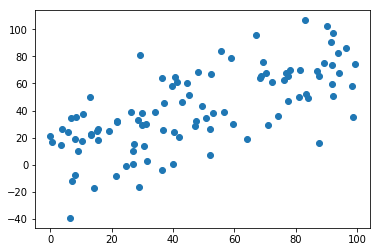

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [4]:
pca=PCA(n_components=1)

In [5]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
desc_X=pca.transform(X)

In [7]:
incr_X=pca.inverse_transform(desc_X)

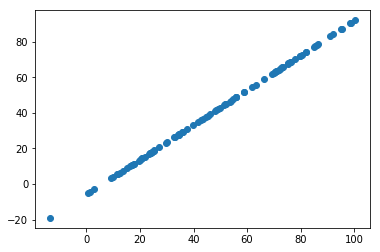

In [8]:
plt.scatter(incr_X[:,0],incr_X[:,1])
plt.show()

### 使用实际数据体会pca降维

In [9]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
original_data=load_digits()
X,y=original_data.data,original_data.target
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [10]:
### 数据有64个维度
print X.shape

(1797L, 64L)


In [11]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

Wall time: 4 ms


In [12]:
knn.score(X_test,y_test)

0.99333333333333329

In [13]:
%%time
pca=PCA(n_components=X_train.shape[1])
pca.fit(X_train)

Wall time: 6 ms


In [14]:
explained_variance_ratio_list=pca.explained_variance_ratio_

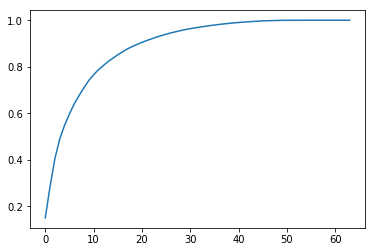

In [15]:
plt.plot(range(X_train.shape[1]),[np.sum(explained_variance_ratio_list[:i+1]) for i in range(X_train.shape[1])])
plt.show()


In [16]:
pca=PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.n_components_
print "数据降低的维度：{}".format(X_train.shape[1]-pca.n_components_)

数据降低的维度：36


In [18]:
reduce_X_train=pca.transform(X_train)
reduce_X_test=pca.transform(X_test)

In [19]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(reduce_X_train,y_train)

Wall time: 2 ms


In [20]:
knn.score(reduce_X_test,y_test)

0.98888888888888893

#### 手写数字降维

In [21]:
from sklearn.datasets import fetch_mldata
original_mnist=fetch_mldata('MNIST original')

In [22]:
print original_mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'COL_NAMES': ['label', 'data'], 'DESCR': 'mldata.org dataset: mnist-original', 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}


In [23]:
X,y=original_mnist.data,original_mnist.target
print X.shape
print y.shape
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)
print X_train.shape
print y_train.shape

(70000L, 784L)
(70000L,)
(42000L, 784L)
(42000L,)


In [24]:
# 不降维的情况下使用KNN进行分类
knn_mnist=KNeighborsClassifier()
%time knn_mnist.fit(X_train,y_train)
print knn_mnist.score(X_test,y_test)

Wall time: 28.1 s
0.967107142857


### 使用PCA进行降维

In [25]:
mnist_pca=PCA(0.9)
mnist_pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
X_train_reduce=mnist_pca.transform(X_train)
X_test_reduce=mnist_pca.transform(X_test)

In [27]:
knn_minist_recude=KNeighborsClassifier()
knn_minist_recude.fit(X_train_reduce,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
knn_minist_recude.score(X_test_reduce,y_test)

0.97203571428571434